# Load Data


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"menikeu","key":"7a417addf875a3f367f5b3c2eeddc20c"}'}

In [ ]:
!mkdir -p ~/.kaggle  # Membuat direktori .kaggle
!cp kaggle.json ~/.kaggle/  # Memindahkan kaggle.json ke direktori tersebut
!chmod 600 ~/.kaggle/kaggle.json  # Mengatur izin akses agar aman

In [ ]:
!kaggle datasets download -d muniryadi/cat-vs-rabbit --unzip

Dataset URL: https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit
License(s): other
 80% 53.0M/65.9M [00:00<00:00, 209MB/s]
100% 65.9M/65.9M [00:00<00:00, 187MB/s]


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ukuran gambar dan batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# ImageDataGenerator untuk augmentasi gambar dan normalisasi
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Directory paths
train_dir = 'train-cat-rabbit'
val_dir = 'val-cat-rabbit'
test_dir = 'test-images'

# Load data training, validasi, dan testing
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # penting untuk evaluasi dengan confusion matrix
)


Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer untuk klasifikasi biner
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 20

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5367 - loss: 0.7038 - val_accuracy: 0.6159 - val_loss: 0.6910
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6735 - loss: 0.5932 - val_accuracy: 0.7246 - val_loss: 0.5154
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8043 - loss: 0.4009 - val_accuracy: 0.7705 - val_loss: 0.4472
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8462 - loss: 0.3406 - val_accuracy: 0.8285 - val_loss: 0.4454
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8850 - loss: 0.2690 - val_accuracy: 0.7874 - val_loss: 0.4855
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9000 - loss: 0.2231 - val_accuracy: 0.8213 - val_loss: 0.4536
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9481 - loss: 0.1462 - val_accuracy: 0.8116 - val_loss: 0.5523
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9413 - loss: 0.1382 - val_accuracy: 0.8430 - val_loss: 0.4699
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8667 - loss: 1.0775
Test Accuracy: 0.8667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


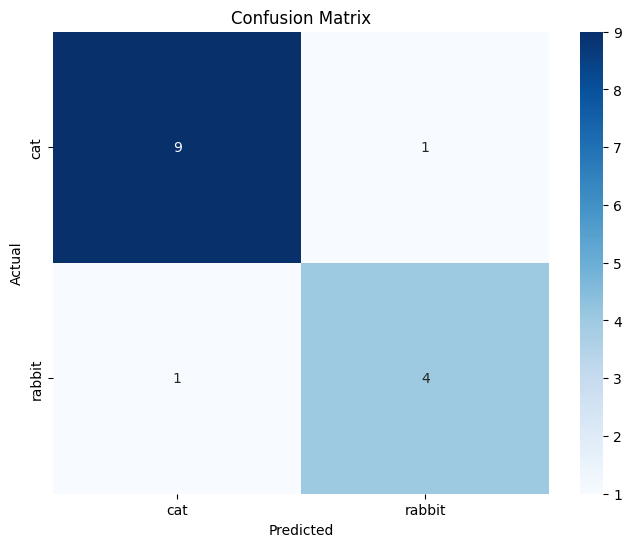

              precision    recall  f1-score   support

         cat       0.90      0.90      0.90        10
      rabbit       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



In [ ]:
# Evaluasi model dengan data test
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Memprediksi label untuk Confusion Matrix
test_gen.reset()
y_pred = (model.predict(test_gen) > 0.5).astype("int32")
y_true = test_gen.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices, yticklabels=test_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))


Saving Mini Lop Bunny Free Photo Download.jpeg to Mini Lop Bunny Free Photo Download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


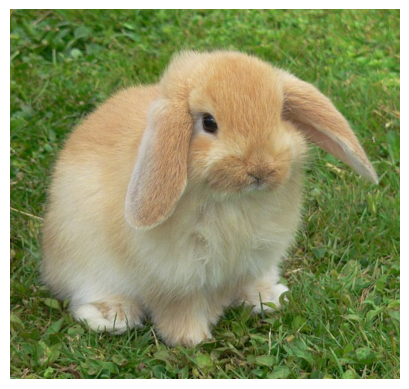

Predicted: Rabbit


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()

# Ambil path gambar yang diunggah
image_path = list(uploaded.keys())[0]

# Load dan preprocess gambar
img = image.load_img(image_path, target_size=(128, 128))  # Sesuaikan dengan ukuran input model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
img_array /= 255.0  # Normalisasi

# Melakukan prediksi
prediction = model.predict(img_array)

# Tampilkan gambar dan hasil prediksi
plt.imshow(image.load_img(image_path))
plt.axis('off')
plt.show()

if prediction[0] > 0.5:
    print("Predicted: Rabbit")
else:
    print("Predicted: Cat")


In [ ]:
# Save model in HDF5 format
model.save('saved_model_cat_vs_rabbit.keras')